In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [4]:
# Load the data
file_path = Path('Diabetes dataset_Group12.csv')
df = pd.read_csv(file_path)
df = df.drop(columns = "ID")
new_df = df.drop(columns = "Label")
new_df.head()

,FPG,HOMA_IR,Total_TAG,2hr_OGTT,T_CE,T_TAG,T_DAG,T_FFA,T_PC,T_PE,...,total DMA,alpha-AAA,Creatinine,Kynurenine,Met-SO,t4-OH-Pro,Putrescine,Serotonin,Spermidine,Taurine
0,6.426266,2.336573,5.781363,6.491854,12.09865,10.273816,4.086167,9.443437,10.80714,7.199930,...,0.111588,1.874979,6.710942,2.394366,-5.852678,4.214117,-3.462398,-1.018531,-1.642998,6.532927
1,6.741468,3.109857,7.906891,7.451211,12.09865,10.807138,4.907486,8.901539,10.27382,7.402848,...,-0.692381,-0.488355,6.008138,0.756260,-3.400239,2.677591,-3.313604,0.813043,-2.012510,7.612722
2,6.672426,3.621295,7.000001,6.942515,12.09865,10.273816,4.379796,8.802699,10.80714,6.759415,...,-0.032965,0.487615,6.008138,1.285267,-4.594876,3.496043,-7.375598,-1.504665,-2.644530,6.185453
3,6.491854,1.563326,7.011228,6.629358,12.09865,10.273816,4.281923,8.522484,10.80714,6.948541,...,0.226960,0.382100,6.440727,2.198089,-2.392424,4.504812,-3.638916,-2.520678,-2.473015,5.894638
4,6.539160,1.997820,6.285404,6.954197,12.09865,9.228706,3.965879,8.901539,10.80714,7.082903,...,1.018463,0.024295,6.532927,2.766317,-8.606643,3.550989,-2.483951,-1.491908,-1.194648,6.267509


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Label'] = df['Label'].astype(str)
df['Label'] = encoder.fit_transform(df['Label'])

In [13]:
# Create our features
X = new_df

# Create our target
y = df["Label"]

In [14]:
X.describe()

,FPG,HOMA_IR,Total_TAG,2hr_OGTT,T_CE,T_TAG,T_DAG,T_FFA,T_PC,T_PE,...,total DMA,alpha-AAA,Creatinine,Kynurenine,Met-SO,t4-OH-Pro,Putrescine,Serotonin,Spermidine,Taurine
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,6.614549,2.701736,6.844076,6.926155,12.133278,10.319602,4.323889,8.893333,10.669212,7.054732,...,-0.254614,0.079763,6.135712,1.663323,-3.658187,3.805103,-3.972084,-2.809970,-2.167594,5.531168
std,0.139946,0.923355,0.822207,0.336438,0.128341,0.613956,0.329148,0.324070,0.235568,0.295159,...,0.840540,0.865511,0.491906,0.682331,2.969190,0.772432,1.907039,2.188667,0.738385,0.906282
min,6.339851,0.706960,5.584967,5.882646,12.098650,9.004653,3.531287,8.110500,10.273820,6.440727,...,-2.520678,-2.973741,4.784064,-0.014012,-10.044284,1.285267,-10.044283,-10.044283,-4.181955,3.590169
25%,6.515637,2.153218,6.228442,6.703892,12.098650,10.273816,4.090292,8.710862,10.407150,6.849232,...,-0.779078,-0.344862,5.824147,1.085826,-5.841102,3.483871,-4.613421,-3.881660,-2.587629,4.789947
50%,6.607312,2.538648,6.761414,6.906891,12.098650,10.273816,4.331543,8.901539,10.807140,7.043002,...,-0.145946,0.150635,6.244521,1.781592,-2.782335,3.868034,-3.405381,-2.407604,-2.127347,5.723925
75%,6.700441,3.319494,7.266787,7.199572,12.098650,10.673808,4.568362,9.111264,10.807140,7.243204,...,0.328442,0.473564,6.532927,2.162975,-1.191318,4.229380,-2.652177,-1.466755,-1.567777,6.185453
max,6.965785,5.093344,8.774787,7.507795,12.600750,11.408379,4.907486,9.443437,10.807140,7.769827,...,1.193675,2.141128,6.798392,3.029029,1.045463,5.202502,-1.147408,0.972990,-0.933018,7.612722


In [15]:
# Check the balance of our target values
y.value_counts()

1    30
0    28
Name: Label, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [17]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
randomforest = BalancedRandomForestClassifier(n_estimators = 100, max_depth= 7, max_features='auto', random_state=1)
resampled = randomforest.fit(X_train, y_train)

In [18]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
yprediction = resampled.predict(X_test)
balanced_accuracy_score(y_test, yprediction)

0.4017857142857143

In [19]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, yprediction)
print(matrix)

[[3 4]
 [5 3]]


In [20]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
report = classification_report_imbalanced(y_test, yprediction)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.38      0.43      0.38      0.40      0.40      0.16         7
          1       0.43      0.38      0.43      0.40      0.40      0.16         8

avg / total       0.40      0.40      0.40      0.40      0.40      0.16        15



In [21]:
# List the features sorted in descending order by feature importance
feature_names = X.columns
sorted(zip(randomforest.feature_importances_, feature_names), reverse=True)

[(0.04087539014530985, '2hr_OGTT'),
 (0.03619919442732483, 'SM (OH) C22:2'),
 (0.03568031716438037, 'SM C24:1'),
 (0.03088458744793331, 'LCER(24:1)'),
 (0.02816000635764441, 'SM C20:2'),
 (0.02476242549388986, 'Kynurenine'),
 (0.023646532334955256, 'HCER(20:0)'),
 (0.022954318776152127, 'HCER(24:1)'),
 (0.021313227799910565, 'SM C16:1'),
 (0.020952565427809402, 'HCER(18:0)'),
 (0.02050355012186825, 'CER(24:0)'),
 (0.019456178841516448, 'LCER(24:0)'),
 (0.019109342636523963, 'SM C16:0'),
 (0.01895759911699693, 'HCER(16:0)'),
 (0.018306272979069955, 'SM C18:0'),
 (0.018137973509215075, 'Cit'),
 (0.017293719776083488, 'Gln'),
 (0.01670962312827344, 'SM (OH) C16:1'),
 (0.016443525660884025, 'Spermidine'),
 (0.016268857679687825, 'CER(22:0)'),
 (0.016150173426377694, 'SM(24:1)'),
 (0.015174631135772441, 'SDMA'),
 (0.014202277114081074, 'CER(24:1)'),
 (0.013868045368177926, 'Tyr'),
 (0.01379598539791341, 'Met-SO'),
 (0.013782026595248662, 'Serotonin'),
 (0.013399194815420547, 'SM(22:1)'),
 (

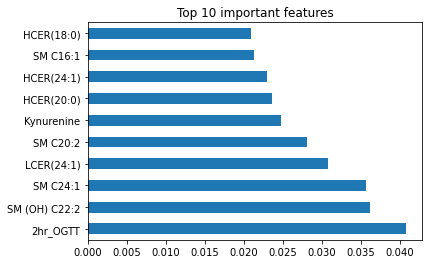

In [23]:
feat_importances = pd.Series(randomforest.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features")
plt.show()

In [26]:
def find_top_10_feature(df):
    feat = []
    feat_name = X.columns
    feat_importances = pd.Series(randomforest.feature_importances_, index=X.columns)
    for f in feat_importances.nlargest(10).keys():
        feat.append(f)
    new_df = df[feat]
    return new_df

In [27]:
top_10_parameters = find_top_10_feature(df)
top_10_parameters

,2hr_OGTT,SM (OH) C22:2,SM C24:1,LCER(24:1),SM C20:2,Kynurenine,HCER(20:0),HCER(24:1),SM C16:1,HCER(18:0)
0,6.491854,3.965879,5.857852,-0.738654,0.066374,2.394366,-2.473015,-0.406482,4.303868,-2.419750
1,7.451211,3.965879,5.553419,-1.478887,-0.393734,0.756260,-5.221904,-2.037494,3.868034,-4.759624
2,6.942515,3.737528,5.511664,-2.269481,-0.398748,1.285267,-3.905027,-2.122977,4.182134,-4.411737
3,6.629358,3.691855,5.780461,-1.344333,0.047862,2.198089,-3.384574,-1.044540,4.234467,-4.014523
4,6.954197,4.331543,6.141387,-0.924504,1.133249,2.766317,-2.718640,-0.738654,4.970330,-3.462398
5,7.011228,3.260484,5.265775,-2.193262,-0.543613,1.874979,-3.867854,-1.672544,3.550989,-4.411737
6,5.882646,4.102666,5.972735,-2.037494,0.236302,2.333384,-3.769828,-0.890075,4.573472,-4.453161
7,6.409392,3.496043,5.706836,-0.933018,-0.083298,2.297289,-3.145012,-1.194648,4.281923,-3.614449
8,6.906891,3.260484,5.629423,-1.418456,-0.347071,1.528768,-3.313604,-1.412654,4.360952,-3.769828
9,6.741468,4.019548,5.894638,-1.319143,0.236302,2.480864,-3.384574,-1.183487,4.442138,-3.666074


In [28]:
top_10_parameters.to_csv('top_10_parameters.csv')